In [1]:
from PyMouSh import MoulinShape, TimeStamps, Qin_sinusoidal, Qin_real
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

secinday = 24*3600
ZERO_KELVIN = 273.15

In [2]:
temperature_profile=np.array([ZERO_KELVIN, ZERO_KELVIN])
ice_thickness = 500
regional_surface_slope = 0
channel_length = 15000

jeme_basin = pd.read_csv('Field_Data/surface_melt_jeme.csv')
jeme_basin = jeme_basin.dropna()
Qin_data = jeme_basin.Qm3s.to_numpy() +0.1
Qtime_data = jeme_basin.SOY.to_numpy()

jeme_moulin = pd.read_csv('Field_Data/head_jeme.csv')
jeme_moulin = jeme_moulin.dropna()
h_real = jeme_moulin.head_bed.to_numpy()
t_real = jeme_moulin.soy.to_numpy()

time_start = Qtime_data[0]
time_end = Qtime_data[0] + 100*secinday# Qtime_data[-1]#time_start + 5*secinday #
timestep = 300 #seconds
time = TimeStamps(time_start,time_end,timestep)

meltwater_input = Qin_real(time, Qin_data, Qtime_data)
# Qin_mean = 1
# dQ = 0.1 
# meltwater_input = Qin_sinusoidal(time,Qin_mean, dQ)



# BRUT METLWATER INPUT -- USUAL PARAM

/Users/celia/GitHub/moulin-physical-model-in-python/PyMouSh.py:637: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  axis.set_ylim([min(self.dict['subglacial_baseflow']),max(self.dict['subglacial_baseflow'])])


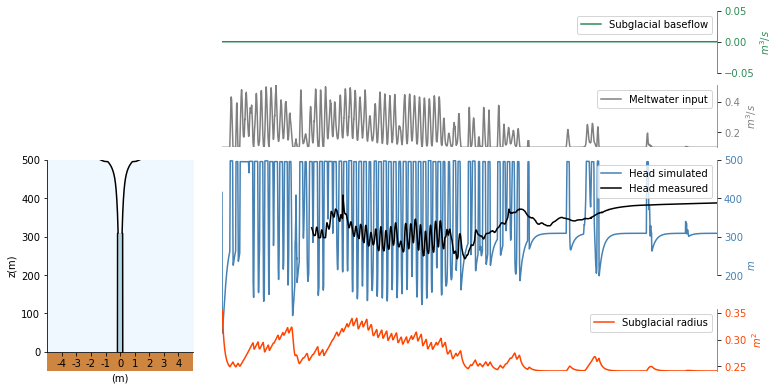

In [3]:
#INITIALIZE MODEL
moulin_brut = MoulinShape(  
                        temperature_profile = temperature_profile,                   
                        ice_thickness = ice_thickness,
                        regional_surface_slope = regional_surface_slope,
                        initial_subglacial_area = 0.2)

for t in time :
    #main subglacial channel
    moulin_brut.run1step(time,
                        timestep,
                        meltwater_input)
    
# PLOT MODEL OUTPUT    
idx = -2
moulin_brut.plot_AGU_3(idx,t_real,h_real)

# BRUT MELTWATER INPUT -- CONNECTED WITH MAIN SUBGLACIAL CHANNEL

In [ ]:
moulin_headL = MoulinShape( channel_length = channel_length,
                            temperature_profile = temperature_profile,                   
                            ice_thickness = ice_thickness,
                            regional_surface_slope = regional_surface_slope)

for t in time :
    #main subglacial channel
    moulin_headL.run1step(time,
                    timestep,
                    meltwater_input,
                    head_L = 290)
    
# PLOT MODEL OUTPUT    
idx = -2
moulin_headL.plot_AGU_3(idx,t_real,h_real)

# BRUT MELTWATER INPUT - with subglacial baseflow

In [ ]:
from PyMouSh import MoulinShape
moulin_baseflow = MoulinShape(  channel_length = channel_length,
                                temperature_profile = temperature_profile,                   
                                ice_thickness = ice_thickness,
                                regional_surface_slope = regional_surface_slope)

for t in time :
    #main subglacial channel
    moulin_baseflow.run1step(time,
                    timestep,
                    meltwater_input,
                    subglacial_baseflow = 4)
    
# PLOT MODEL OUTPUT   
plt.figure()
idx = int(moulin_baseflow.idx/2)
moulin_baseflow.plot_AGU_3(idx,t_real,h_real)

fig, ax = plt.subplots()
moulin_baseflow.plot_head(ax)

fig, ax = plt.subplots()
moulin_baseflow.plot_radius(ax)
moulin_baseflow.plot_AGU_3(idx,t_real,h_real)

# BRUT METLWATER INPUT -- fixed shape similar to FOXX moulin

In [ ]:
#INITIALIZE MODEL
moulin_goblet = MoulinShape(z_elevations = (0,399,400,500),
                            moulin_radii = (1.5,1.5,5,5),                             
                            channel_length = channel_length,
                            temperature_profile = temperature_profile,                   
                            ice_thickness = ice_thickness,
                            regional_surface_slope = regional_surface_slope)

for t in time :
    #main subglacial channel
    moulin_goblet.run1step(time,
                    timestep,
                    meltwater_input,
                    creep=False,
                    elastic_deformation=False,
                    melt_below_head=False,
                    open_channel_melt=False,
                    potential_drop=False,
                    ice_motion=False,
                    refreezing=False)
    
# PLOT MODEL OUTPUT    

moulin_goblet.plot_AGU_3(idx,t_real,h_real)
idx_plot = 0
#for idx in np.arange(1,moulin_goblet.idx-1,6):
#    idx_plot +=1
#    moulin_goblet.plot_AGU_3(idx,t_real,h_real)
#    plt.savefig('/Users/cctrunz/Dropbox/RESEARCH/MOULIN-SHAPE-FIGURES-MOVIES/AGU2020_movies/Jeme_BrutMeltwaterInput_FixedShapeFoxx_%d'%idx_plot)
#    plt.close()

In [ ]:
np.arange(1,moulin_goblet.idx-1,6)

# BRUT METLWATER INPUT -- fixed shape - just a cylinder

In [ ]:
#INITIALIZE MODEL
moulin_goblet = MoulinShape(moulin_radii = 5.,                  
                            channel_length = channel_length,
                            temperature_profile = temperature_profile,                   
                            ice_thickness = ice_thickness,
                            regional_surface_slope = regional_surface_slope)

for t in time :
    #main subglacial channel
    moulin_goblet.run1step(time,
                    timestep,
                    meltwater_input,
                    creep=False,
                    elastic_deformation=False,
                    melt_below_head=False,
                    open_channel_melt=False,
                    potential_drop=False,
                    ice_motion=False,
                    refreezing=False)
    
# PLOT MODEL OUTPUT    
idx = -2
moulin_goblet.plot_AGU_3(idx,t_real,h_real)